<a href="https://colab.research.google.com/github/rumela-ghossh/TASK-1/blob/main/TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**To predict the percentage of a student based on the no. of study hours.**


**importing the libraries**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

**importing the data**

In [ ]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)
print("The data is successfully imported")
data #Displayig the dataset

The data is successfully imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
data.shape #to check the dimensionality of the dataframe (rows,columns)

(25, 2)

In [ ]:
data.info() #To display the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.describe() #Calculating all constraints

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Data visualization**

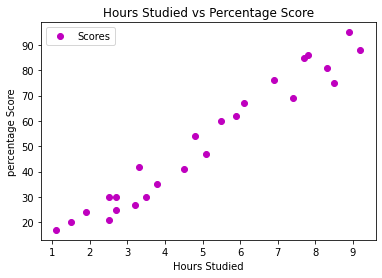

In [ ]:
data.plot(x='Hours', y='Scores' , style='o' ,c='m') 
#Relationship between the hours studied and the percentage scores obtained 
plt.title('Hours Studied vs Percentage Score')
plt.xlabel('Hours Studied')
plt.ylabel('percentage Score')
plt.show()

**The score range**

Text(0.5, 1.0, 'Score Ranges')

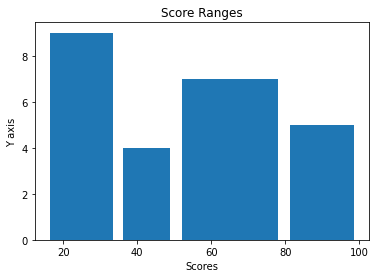

In [ ]:
plt.hist(data.Scores, bins=[15,35,50,80,100], rwidth=0.86,)
plt.xlabel('Scores')
plt.ylabel('Y axis')
plt.title('Score Ranges')

**Linear Regression Model**

**Preparing the data for training**

In [ ]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 
#Splitting the dataset into train and test data
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

**Training using linear regression**

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 
print("Training has been completed")

Training has been completed


**Plotting the regression line**

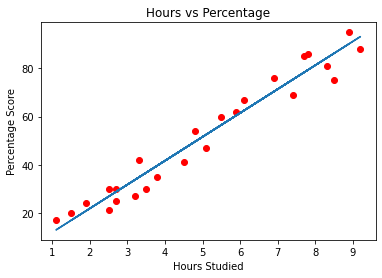

In [ ]:
line = regressor.coef_*x+regressor.intercept_
plt.scatter(x, y,c='r')
#Plotting for the test data
plt.plot(x, line);
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

**Predicting the scores and comparing the Predicted value with the Actual value**

In [ ]:
print(x_test) 
y_pred = regressor.predict(x_test)
#To make predictions on the test data

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
#Actual vs Predicted value
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Visualization of Predicted vs Actual value**

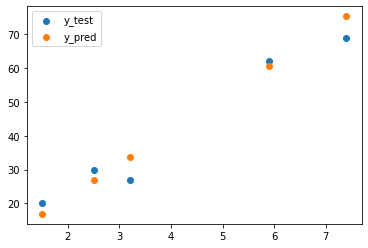

In [ ]:
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_pred)
plt.legend(['y_test','y_pred'])
plt.show()

**Predicting the score of a student who studies for 9.25 hours a day**

In [ ]:
print('Predicted Score of the student who studies for 9.25 hours a day is', regressor.predict([[9.25]]))

Predicted Score of the student who studies for 9.25 hours a day is [93.69173249]


**Model evaluation metrics**

In [ ]:
#Calculating the accuracy of the model
print("The accuracy is:",regressor.score(x_test,y_test))

The accuracy is: 0.9454906892105354


In [ ]:
from sklearn import metrics
#Calculating the Mean Squared and the Mean Absolute Error
mean_squ_error = mean_squared_error(y_test, y_pred)
mean_abs_error = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:",mean_squ_error)
print("Mean Absolute Error:",mean_abs_error)

Mean Squared Error: 21.598769307217456
Mean Absolute Error: 4.183859899002982
